<a href="https://colab.research.google.com/github/GoldenMAverick/Tata_stock_analysis_using_LSTM/blob/main/TATA_Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NSE Tata Global stock analysis

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import datetime
%matplotlib inline

In [86]:
df= pd.read_csv('/content/NSE-TATAGLOBAL11.csv')
df1= pd.read_csv('/content/NSE-TATAGLOBAL11.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [87]:
df.shape

(1235, 8)

In [88]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [89]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


# Data Cleaning




In [91]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


In [92]:
NAN = [(c, df[c].isnull().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=['column_name', 'percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


<Axes: >

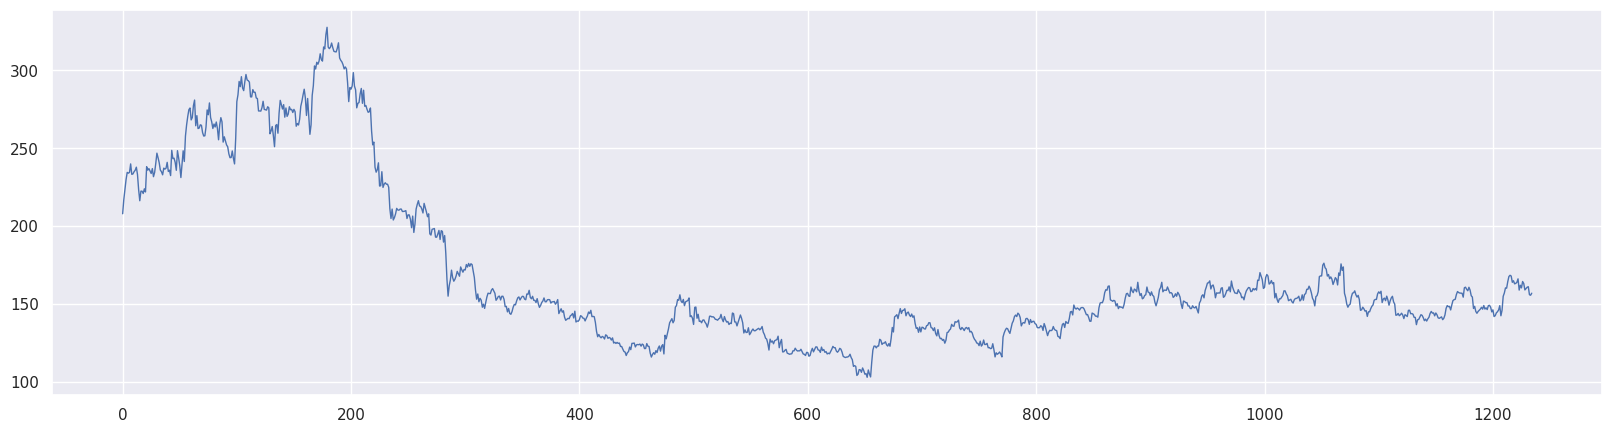

In [93]:
sns.set(rc= {'figure.figsize' : (20, 5)})
df['Open'].plot(linewidth = 1, color='b')

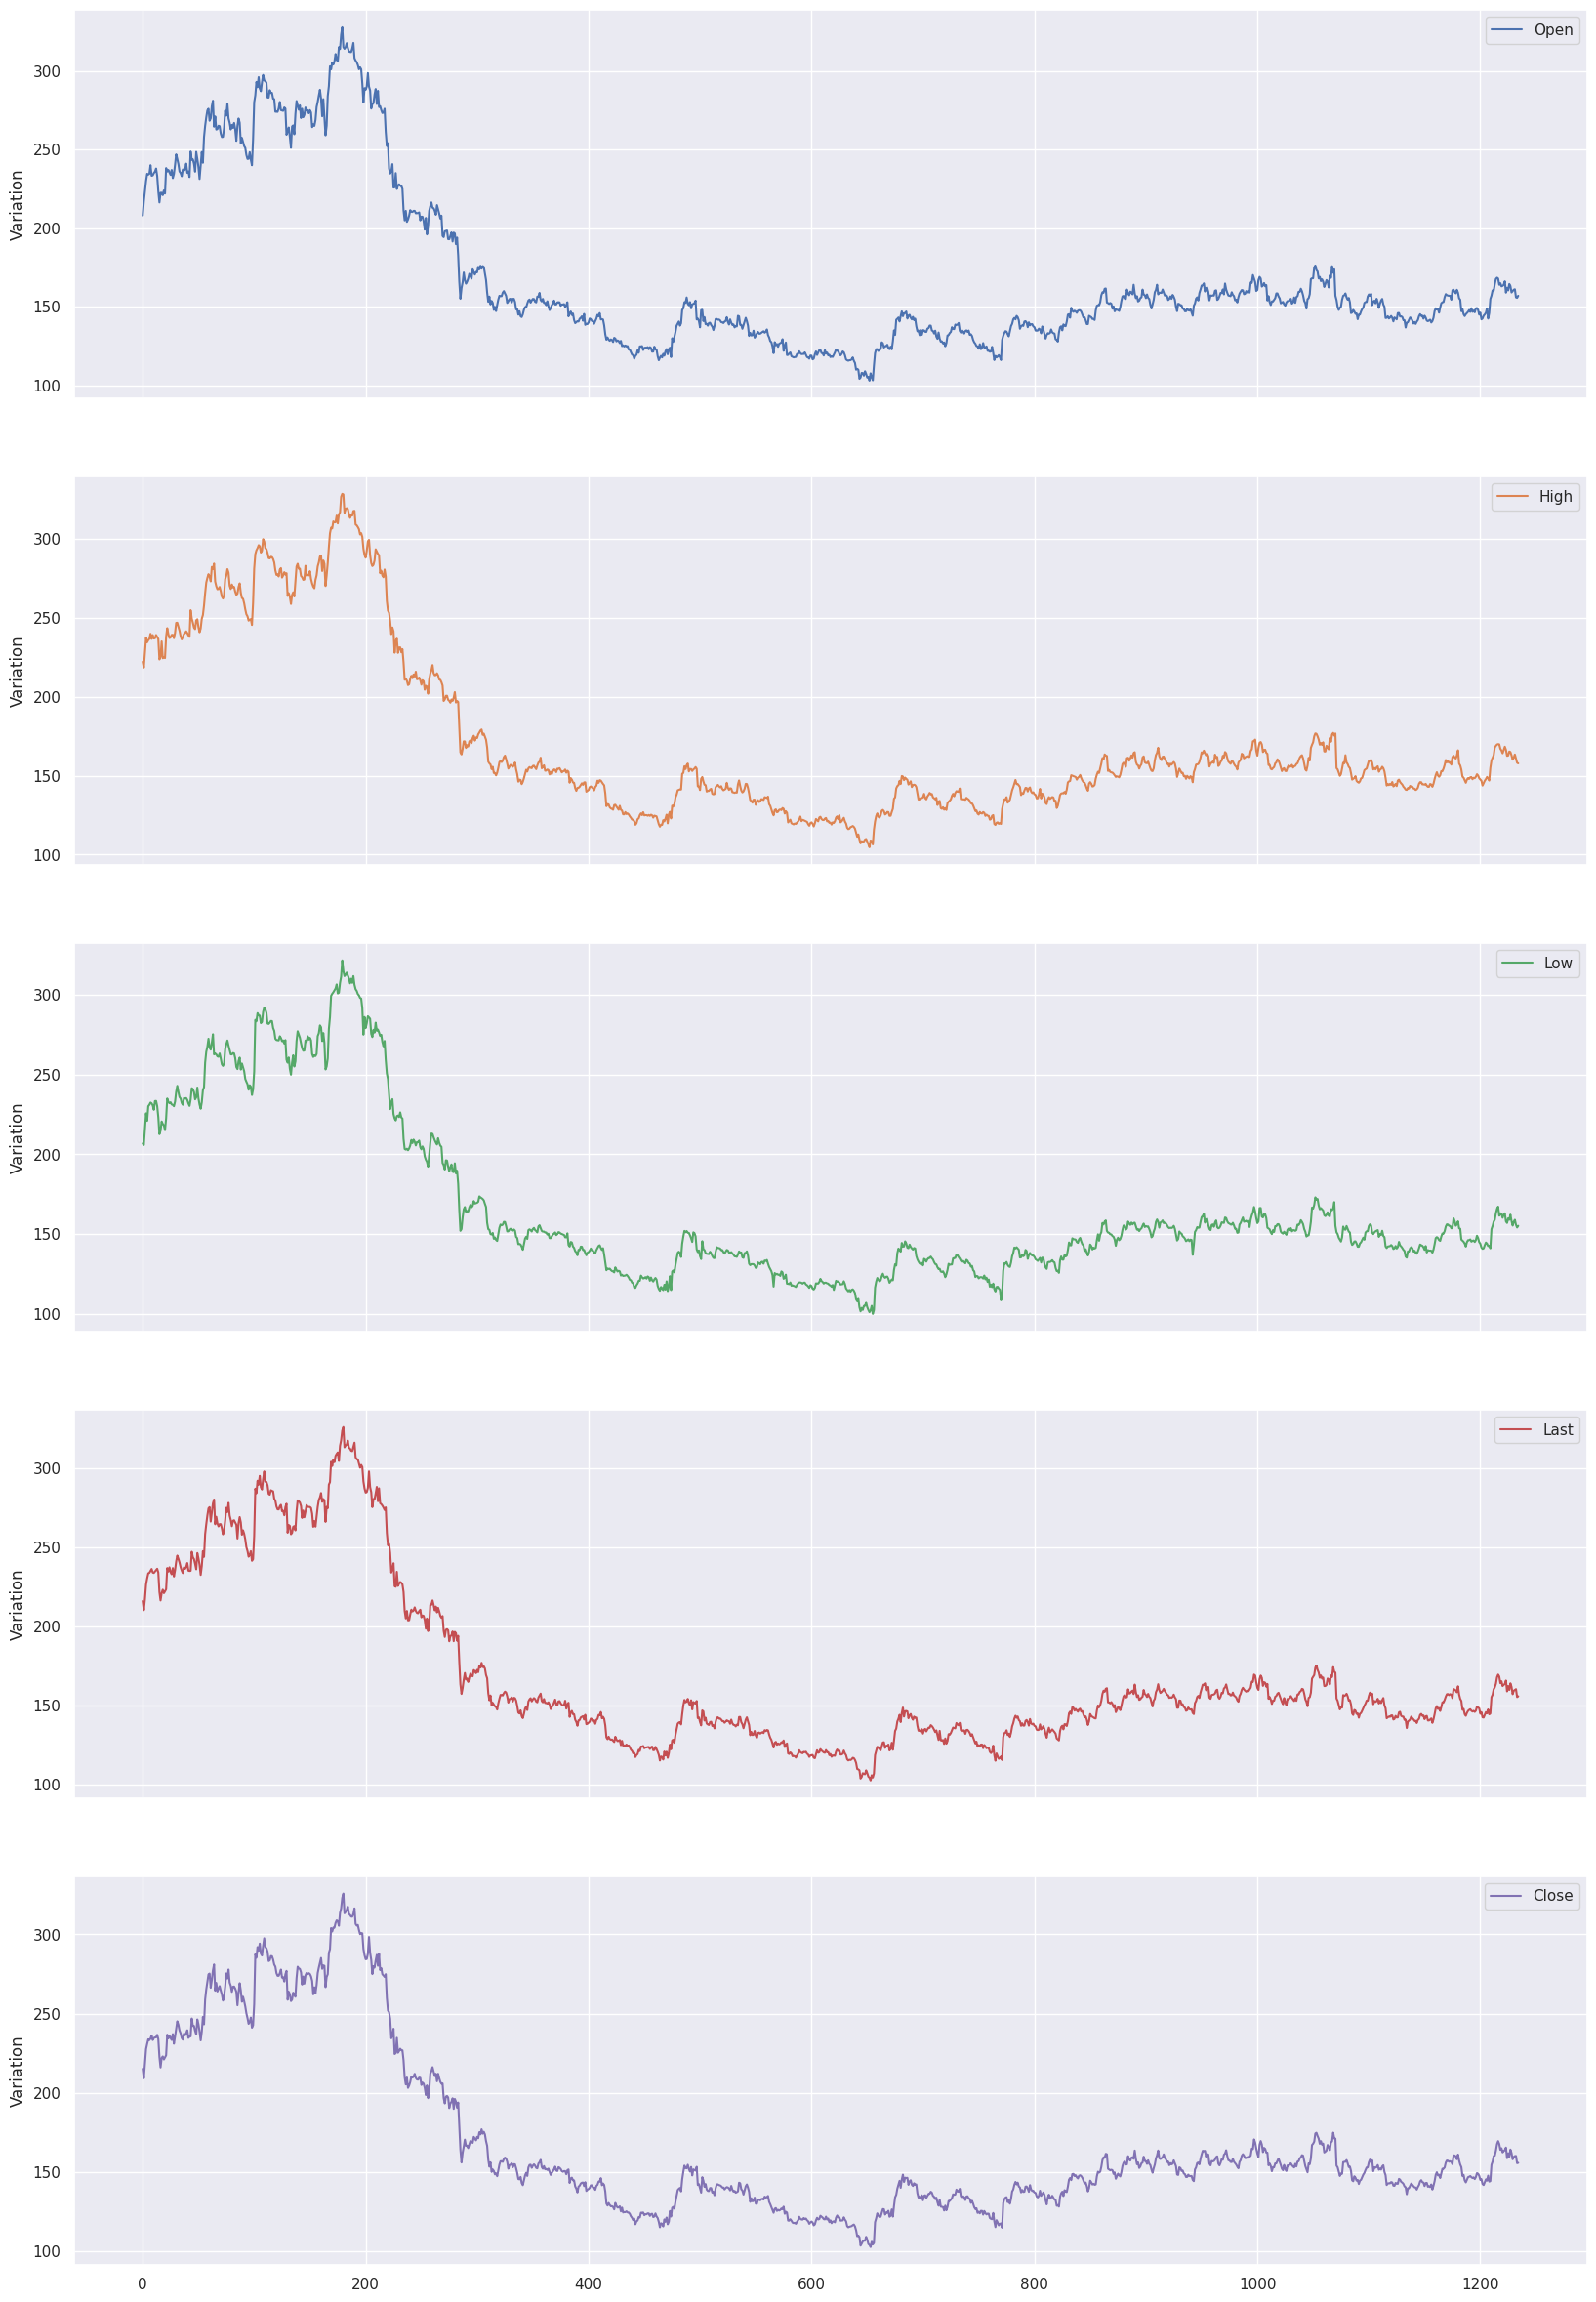

In [94]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

In [95]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
del df['Date']
df

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...
2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80


In [96]:
df.rolling(7).mean().head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-27,225.950000,230.500000,219.571429,223.935714,224.007143,3.040937e+06,6822.042857
2018-09-26,230.521429,233.035714,223.235714,226.650000,226.735714,2.697903e+06,6134.295714
2018-09-25,232.850000,235.628571,226.964286,230.364286,230.578571,2.530739e+06,5862.415714


<Axes: xlabel='Date'>

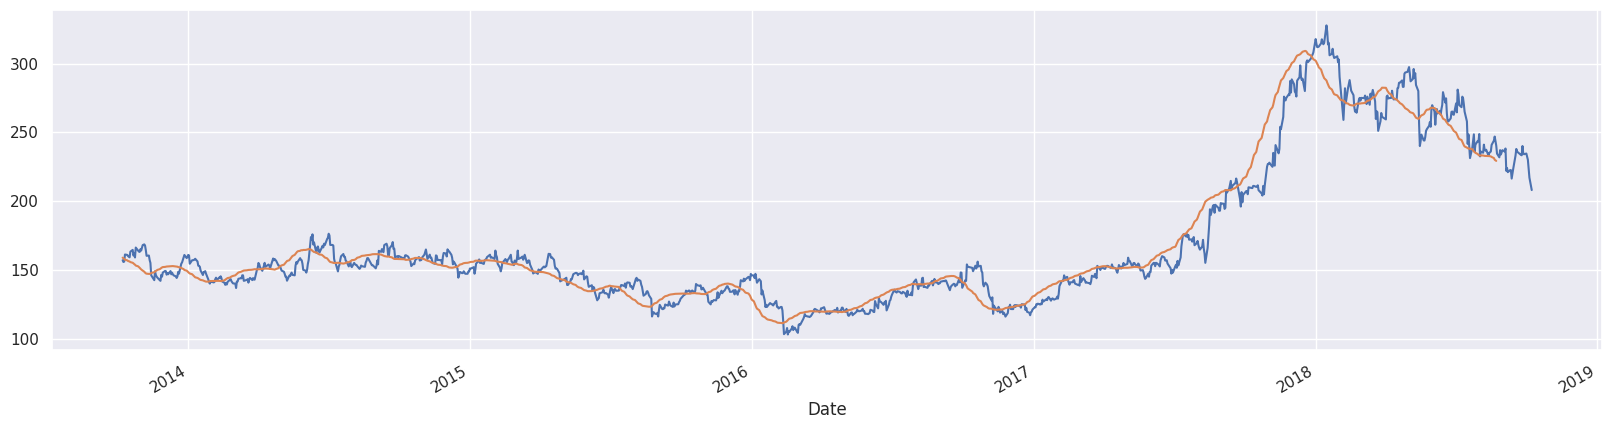

In [97]:
df['Open'].plot(figsize=(20,5),alpha = 1)
df.rolling(window=30).mean()['Close'].plot(alpha = 1)

In [98]:
df2= df1.reset_index()['Open']
df2

,Open
0,208.00
1,217.00
2,223.50
3,230.00
4,234.55
...,...
1230,160.85
1231,161.15
1232,156.00
1233,155.70


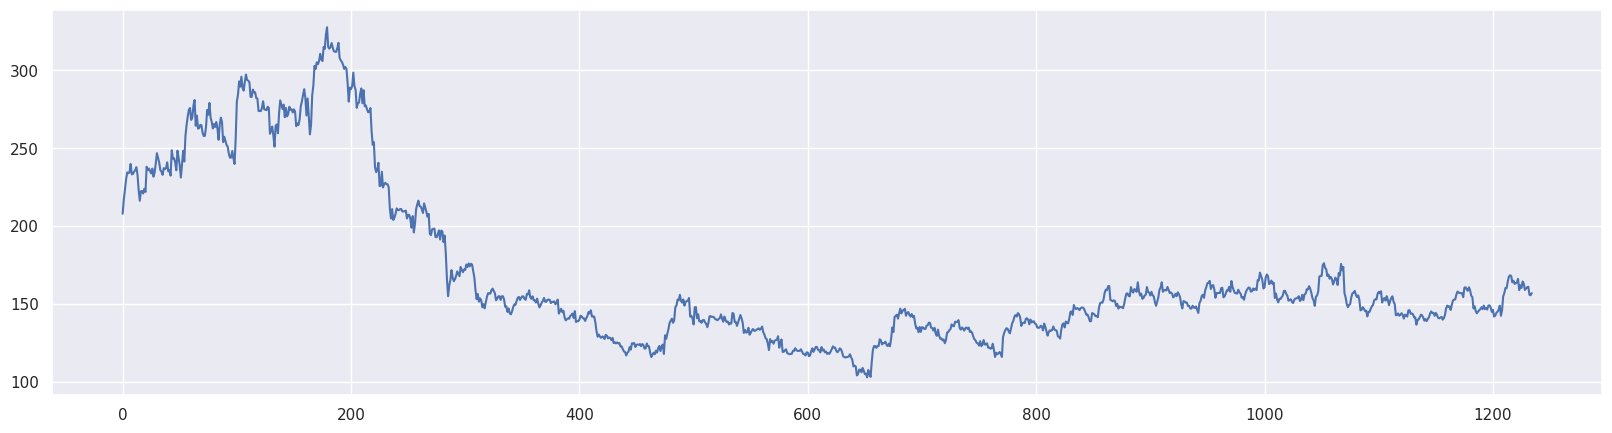

In [99]:
plt.plot(df2)

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
print(df2)

[[0.46728972]
 [0.50734312]
 [0.53627058]
 ...
 [0.23587005]
 [0.23453494]
 [0.24032043]]


In [101]:
df2.shape

(1235, 1)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
train_data, test_data= train_test_split(df2, random_state=42, test_size=0.25)

In [104]:
train_data.shape, test_data.shape

((926, 1), (309, 1))

# Creating the required dataset using Time Series


In [105]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return numpy.array(train_X), numpy.array(train_Y)

In [106]:
import numpy
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [107]:
print(X_train.shape), print(y_train.shape)

(825, 100)
(825,)


(None, None)

In [108]:
X_train

array([[0.16444148, 0.08923008, 0.22429907, ..., 0.13796173, 0.77659101,
        0.76101469],
       [0.08923008, 0.22429907, 0.22140632, ..., 0.77659101, 0.76101469,
        0.25033378],
       [0.22429907, 0.22140632, 0.6141522 , ..., 0.76101469, 0.25033378,
        0.07387628],
       ...,
       [0.16866934, 0.20071206, 0.22830441, ..., 0.0658656 , 0.76056965,
        0.20404984],
       [0.20071206, 0.22830441, 0.29372497, ..., 0.76056965, 0.20404984,
        0.20672007],
       [0.22830441, 0.29372497, 0.21784602, ..., 0.20404984, 0.20672007,
        0.18024032]])

In [109]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating LSTM Model

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [111]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [112]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - loss: 0.0816 - val_loss: 0.0552
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0562 - val_loss: 0.0550
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - loss: 0.0554 - val_loss: 0.0518
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 0.0523 - val_loss: 0.0516
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 0.0530 - val_loss: 0.0515
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - loss: 0.0557 - val_loss: 0.0513
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 0.0608 - val_loss: 0.0513
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 0.0596 - val_loss: 0.0513
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 0.0546 - val_loss: 0.0523
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - loss: 0.0569 - val_loss: 0.0511
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - loss: 0.0537 - val_loss: 0.0518
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3

In [114]:
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [115]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [116]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [124]:
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+look_back:len(train_predict)+look_back+len(test_predict), :] = test_predict

In [130]:
import math
from sklearn.metrics import mean_squared_error

# Calculate RMSE for training data
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict.reshape(-1)))
print(f"Train RMSE: {train_rmse}")

# Calculate RMSE for test data
test_rmse = math.sqrt(mean_squared_error(ytest, test_predict.reshape(-1)))
print(f"Test RMSE: {test_rmse}")

Train RMSE: 167.38060494693448
Test RMSE: 167.34154213108866


# Plotting and Predictions

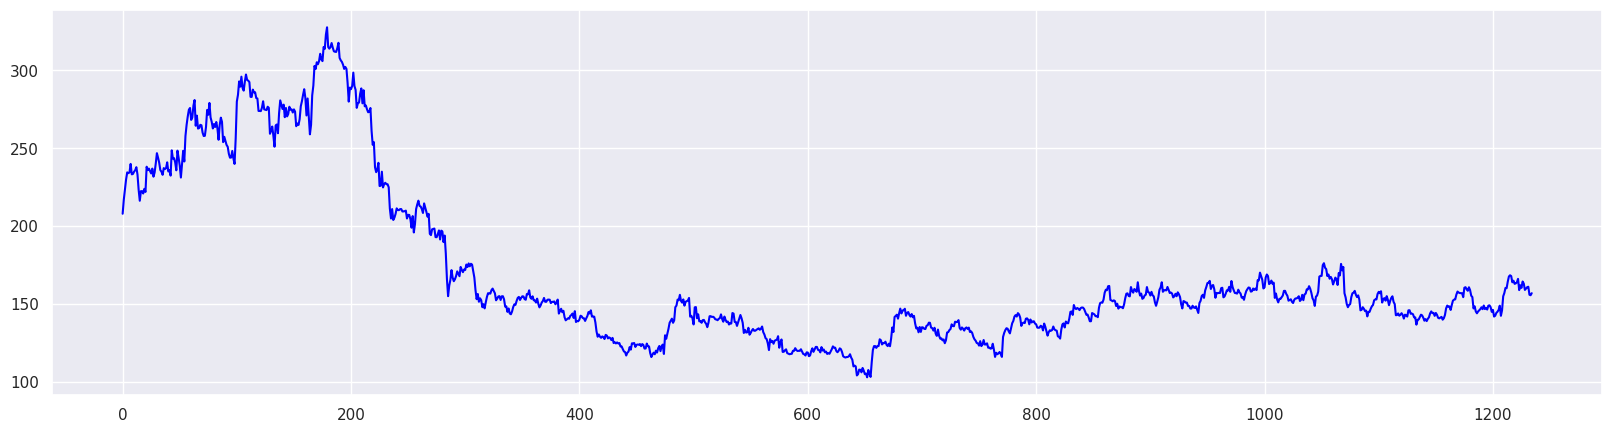

In [131]:
pred  = scaler.inverse_transform(df2)
plt.plot(pred,color='blue')
plt.show()

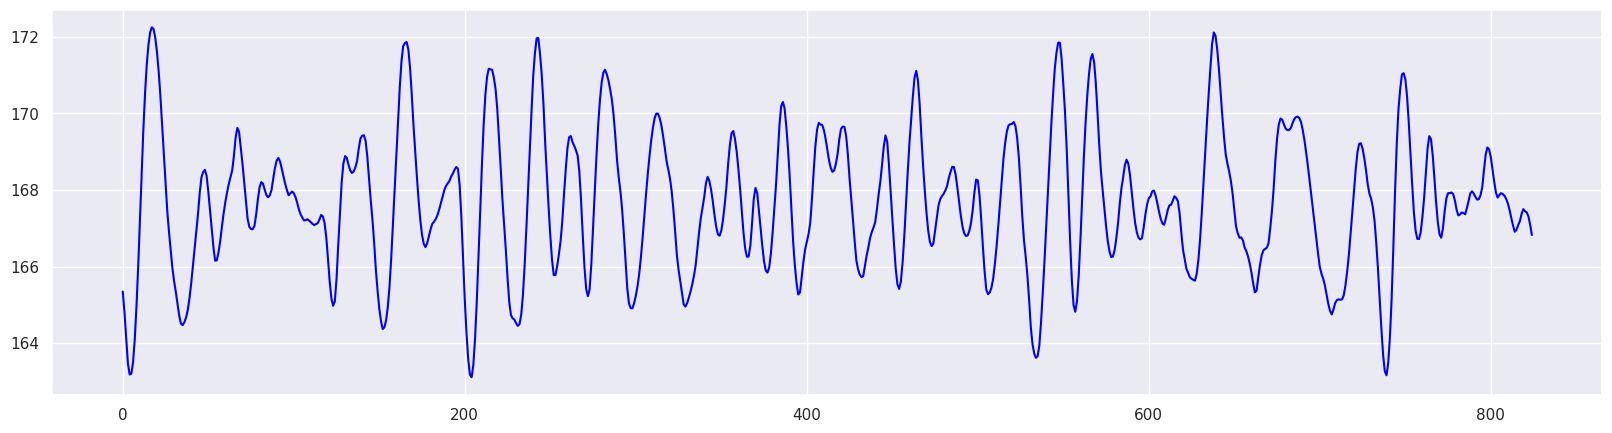

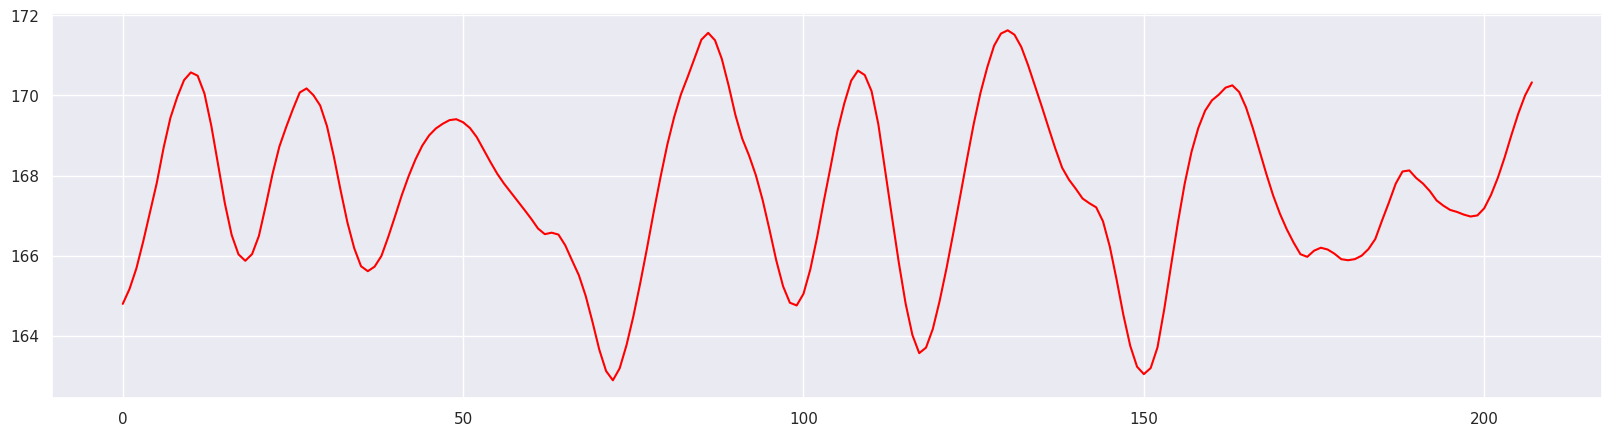

In [132]:
plt.plot(train_predict, color='blue')
plt.show()
plt.plot(test_predict, color= 'red')
plt.show()

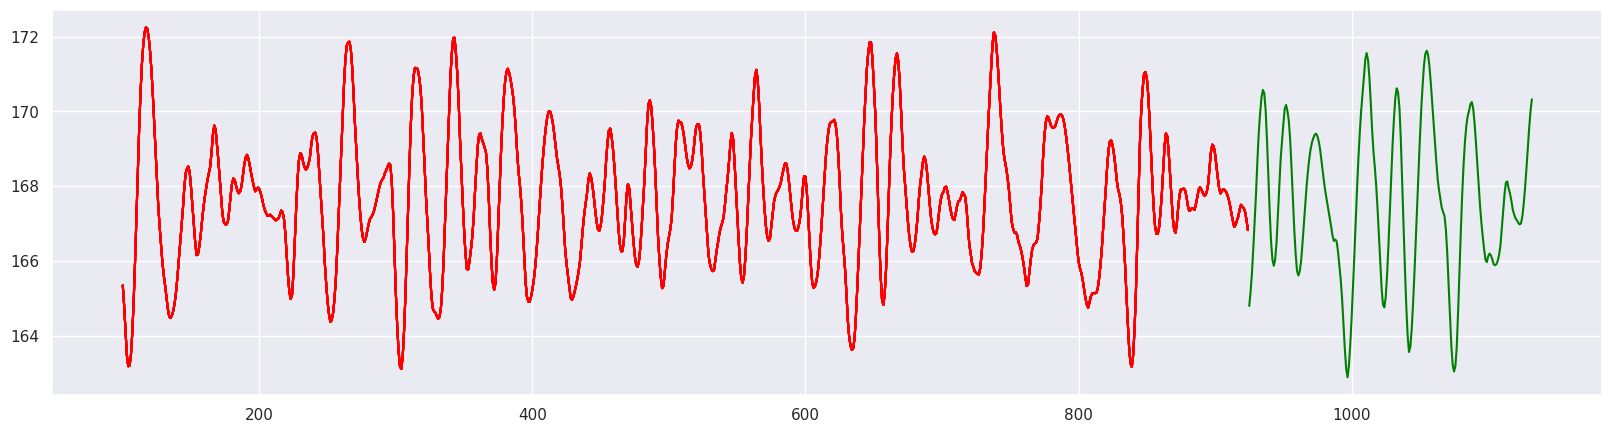

In [133]:
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

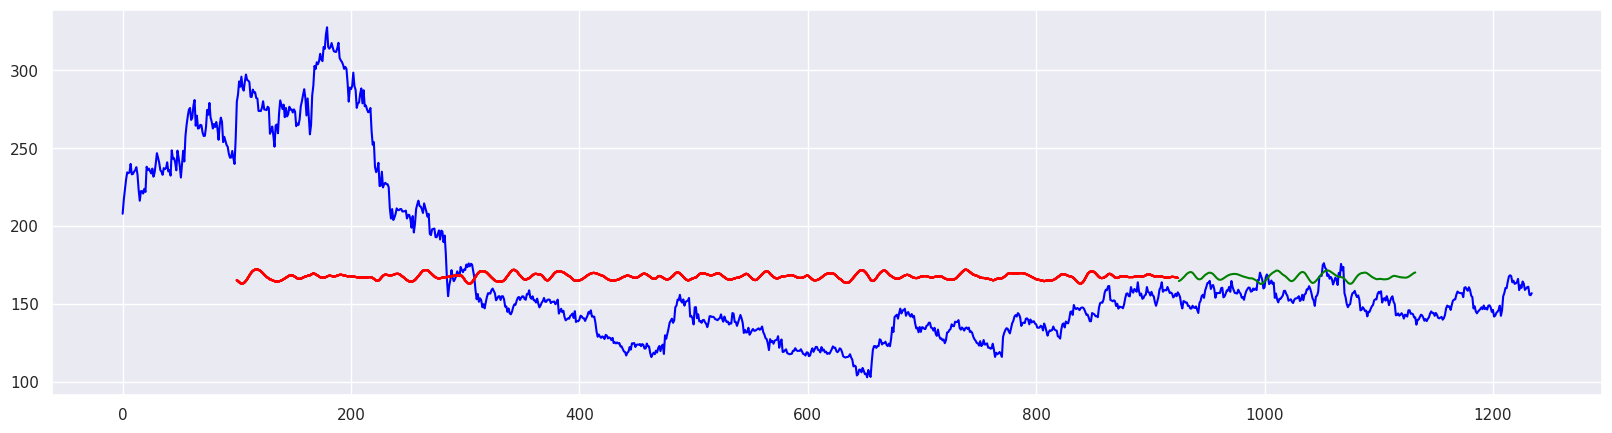

In [134]:
plt.plot(pred,color='blue')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()